In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/bank_marketing.csv')
print(df.info())
print('')
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


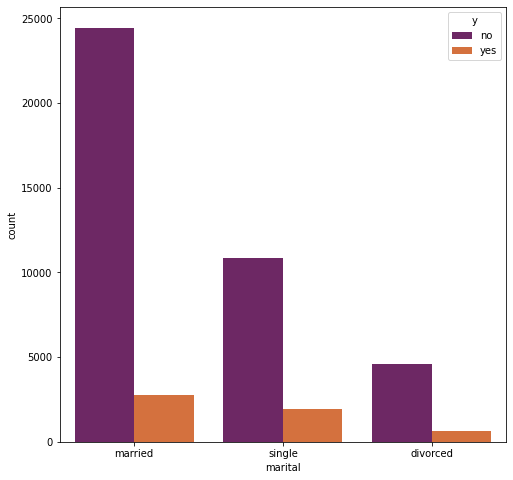

In [ ]:

plt.figure(figsize=(8,8))
sns.countplot(x = 'marital', hue = 'y', data=df,palette = 'inferno')
plt.show()

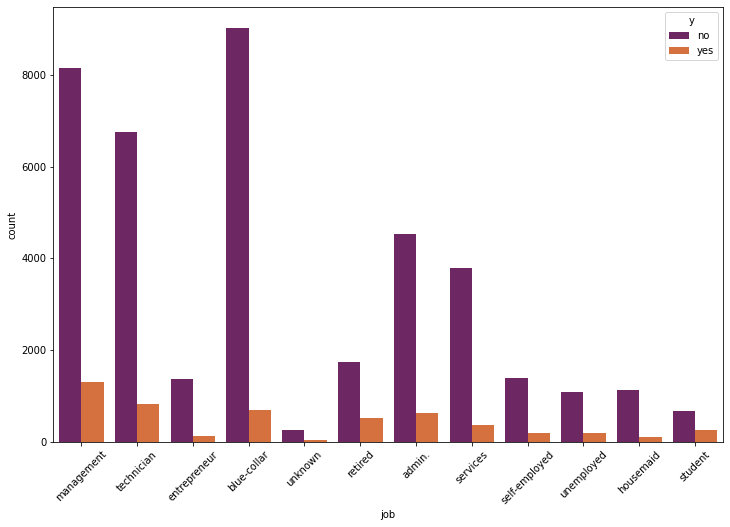

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x = 'job', hue = 'y', data=df,palette = 'inferno')
plt.xticks(rotation=45)
plt.show()

In [ ]:
columns = df.select_dtypes(include='object').columns
df = pd.concat([df, pd.get_dummies(df[columns])], axis=1)
df = df.drop(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'poutcome', 'y', 'y_no'], axis =1)
df.head()


,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,47,1506,5,92,1,-1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


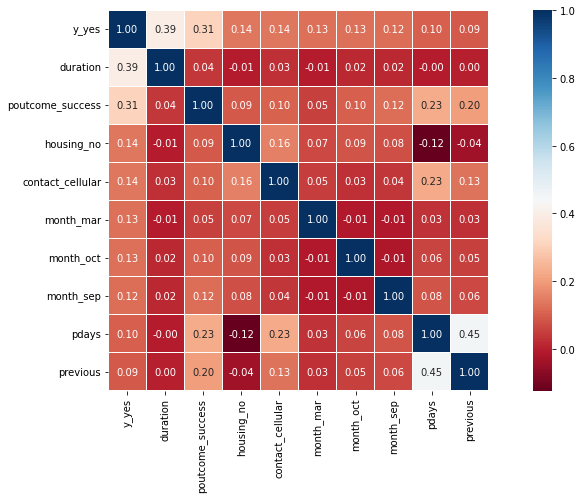

In [ ]:
a,x = plt.subplots(figsize=(16, 7))
corr = df.corr()
max_corr = corr.nlargest(10, 'y_yes')['y_yes'].index
cm = np.corrcoef(df[max_corr].values.T)
matrix = sns.heatmap(cm, annot=True, square=True, fmt='.2f', 
                 linewidths= 0.1, vmax = 1, cmap = 'RdBu',
                  yticklabels=max_corr.values, xticklabels=max_corr.values, ax = x)
plt.show()


In [ ]:
y = df.y_yes
df = df.drop(['y_yes'], axis = 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)

              precision    recall  f1-score   support

       <=50K       0.90      0.99      0.94     11966
        >50K       0.77      0.16      0.27      1598

    accuracy                           0.90     13564
   macro avg       0.83      0.58      0.60     13564
weighted avg       0.88      0.90      0.86     13564



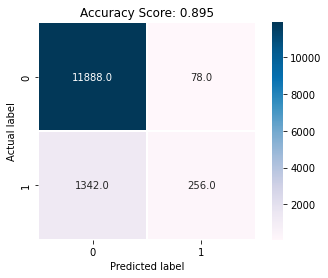

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report

rf = RandomForestClassifier(n_estimators=100, n_jobs=-1,
                            random_state=0, max_features= 10, 
                            max_depth= 5)
rf.fit(X_train, y_train)
rf_predict = rf.predict(X_test)

print(classification_report(y_test, rf_predict, target_names=['<=50K', '>50K']))

score = round(accuracy_score(y_test, rf_predict),3)
cm1 = cm(y_test, rf_predict)

sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
            square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score), size = 12)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score

print(cross_val_score(RandomForestClassifier(n_estimators=100, 
                                 n_jobs=-1, random_state=0, max_features= 10, 
                            max_depth= 5), 
                              X_train, y_train, cv=5))
print('')
print('mean of cv-scores: {0}'.format(round(np.mean(cross_val_score(RandomForestClassifier(n_estimators=100, 
                                 n_jobs=-1, random_state=42, max_features= 10, 
                            max_depth= 5), 
                              X_train, y_train, cv=5)),4)))

[0.89526066 0.8957346  0.89666614 0.89508611 0.89398009]

mean of cv-scores: 0.8956


In [ ]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, 
                                random_state=0)

rf_params = {'max_depth': range(3,13), 'max_features': range(5,15)}

rf_grid = GridSearchCV(rf, rf_params,
                           cv=5, n_jobs=-1, 
                       verbose=True)

rf_grid.fit(X_train, y_train)
print('')
print(rf_grid.best_params_)
print('Best cv mean result: {0}'.format(round(rf_grid.best_score_,5)))
print('Best holdout result: {0}'.format(round(accuracy_score(y_test, rf_grid.predict(X_test)),5)))

Fitting 5 folds for each of 100 candidates, totalling 500 fits

{'max_depth': 12, 'max_features': 14}
Best cv mean result: 0.9065
Best holdout result: 0.90467


knn için params = {‘knn__n_neighbors’: range(1, 5)} yazarak GridSearchCV yapabilirsiniz.

